Loaded 500 samples from ECG5000/ECG5000_TRAIN.ts
Loaded 4500 samples from ECG5000/ECG5000_TEST.ts
Number of classes: 5
y_train unique labels: [0 1 2 3 4]
y_test unique labels: [0 1 2 3 4]
x_train shape: (500, 139)
y_train shape: (500,)
x_test shape: (4500, 139)
y_test shape: (4500,)
x_train_resampled shape: (1460, 139)
y_train_resampled shape: (1460,)
x_test reduced shape: (675, 139)
y_test reduced shape: (675,)


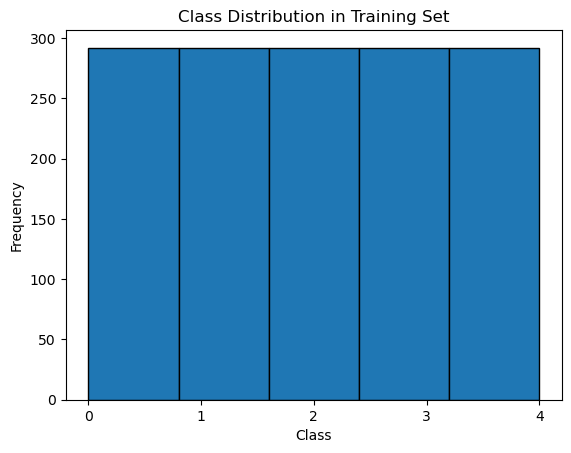

C:\Users\vmadhuu\AppData\Local\anaconda3\envs\tscproj\Lib\site-packages\torch\nn\modules\transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


Epoch [1/200] | Loss: 1.2151, Training accuracy: 54.59%
Test Loss after Epoch 1: 0.3198, Test Accuracy after Epoch 1: 96.89%
Epoch [2/200] | Loss: 0.9588, Training accuracy: 67.33%
Test Loss after Epoch 2: 0.6960, Test Accuracy after Epoch 2: 82.37%
Epoch [3/200] | Loss: 0.8006, Training accuracy: 73.22%
Test Loss after Epoch 3: 0.2596, Test Accuracy after Epoch 3: 95.56%
Epoch [4/200] | Loss: 0.6964, Training accuracy: 75.75%
Test Loss after Epoch 4: 0.7722, Test Accuracy after Epoch 4: 71.26%
Epoch [5/200] | Loss: 0.6274, Training accuracy: 78.15%
Test Loss after Epoch 5: 0.6650, Test Accuracy after Epoch 5: 76.44%
Epoch [6/200] | Loss: 0.5728, Training accuracy: 80.27%
Test Loss after Epoch 6: 0.7661, Test Accuracy after Epoch 6: 72.44%
Epoch [7/200] | Loss: 0.5393, Training accuracy: 81.78%
Test Loss after Epoch 7: 0.3505, Test Accuracy after Epoch 7: 91.11%
Epoch [8/200] | Loss: 0.5051, Training accuracy: 83.56%
Test Loss after Epoch 8: 0.7394, Test Accuracy after Epoch 8: 74.37%


KeyboardInterrupt: 

In [32]:
#### Transformer doing Multiclass Classification using ECG5000 datasset

# ### Binary Classification
# import numpy as np
# import torch
# import torch.nn as nn
# import torch.optim as optim
# from torch.utils.data import DataLoader, TensorDataset
# import matplotlib.pyplot as plt
# from imblearn.over_sampling import SMOTE

# # Device configuration
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# # Read UCR Dataset
# def read_ucr(filename):
#     data = []
#     labels = []
    
#     with open(filename, 'r') as file:
#         for line in file:
#             parts = line.strip().split(',')
#             if len(parts) < 2:  # Ensure there's at least one feature and one label
#                 continue
#             features = [float(f) for f in parts[:-1]]
#             label = int(parts[-1].split(':')[-1])  # Handle label after the colon
#             data.append(features)
#             labels.append(label)
    
#     print(f"Loaded {len(data)} samples from {filename}")
#     return np.array(data), np.array(labels)

# train_file = 'ECG/ECG_TRAIN.ts'
# test_file = 'ECG/ECG_TEST.ts'

# # Load dataset
# x_train, y_train = read_ucr(train_file)
# x_test, y_test = read_ucr(test_file)

# # Normalize labels to be within range [0, num_classes-1]
# unique_labels = np.unique(y_train)
# label_map = {label: idx for idx, label in enumerate(unique_labels)}
# y_train = np.array([label_map[label] for label in y_train])
# y_test = np.array([label_map[label] for label in y_test])

# nb_classes = len(unique_labels)

# # Verify labels are within range
# print(f"Number of classes: {nb_classes}")
# print(f"y_train unique labels: {np.unique(y_train)}")
# print(f"y_test unique labels: {np.unique(y_test)}")

# # Ensure labels are within the expected range [0, num_classes-1]
# assert y_train.min() >= 0 and y_train.max() < nb_classes, "Train labels are out of range"
# assert y_test.min() >= 0 and y_test.max() < nb_classes, "Test labels are out of range"

# # Print shapes to ensure they match
# print(f"x_train shape: {x_train.shape}")
# print(f"y_train shape: {y_train.shape}")
# print(f"x_test shape: {x_test.shape}")
# print(f"y_test shape: {y_test.shape}")

# # Apply SMOTE to the training data
# smote = SMOTE()
# x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# # Convert to PyTorch tensors
# X_train = torch.tensor(x_train_resampled, dtype=torch.float32).unsqueeze(-1)  # Add feature dimension
# X_test = torch.tensor(x_test, dtype=torch.float32).unsqueeze(-1)
# y_train = torch.tensor(y_train_resampled, dtype=torch.long)
# y_test = torch.tensor(y_test, dtype=torch.long)

# # Create Data Loaders
# train_dataset = TensorDataset(X_train, y_train)
# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_dataset = TensorDataset(X_test, y_test)
# test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# # Plot class distribution
# plt.hist(y_train.numpy(), bins=nb_classes, edgecolor='k')
# plt.title('Class Distribution in Training Set')
# plt.xlabel('Class')
# plt.ylabel('Frequency')
# plt.xticks(ticks=np.arange(nb_classes))
# plt.show()

# # Define the Transformer model with Batch Normalization and increased complexity
# class TransformerModel(nn.Module):
#     def __init__(self, input_dim, num_classes, dim_model=128, num_heads=8, num_layers=4, dropout=0.3):
#         super(TransformerModel, self).__init__()
#         self.embedding = nn.Linear(input_dim, dim_model)
#         self.position_encoding = nn.Parameter(torch.zeros(1, 100, dim_model))  # Assuming sequence length of 100
#         encoder_layer = nn.TransformerEncoderLayer(d_model=dim_model, nhead=num_heads, dropout=dropout)
#         self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
#         self.bn = nn.BatchNorm1d(dim_model)
#         self.fc = nn.Linear(dim_model, num_classes)
#         self.dropout = nn.Dropout(dropout)
    
#     def forward(self, x):
#         x = self.embedding(x)
#         x += self.position_encoding[:, :x.size(1), :]
#         x = x.permute(1, 0, 2)  # Transformer expects input of shape (seq_len, batch, dim_model)
#         x = self.transformer_encoder(x)
#         x = x.mean(dim=0)
#         x = self.bn(x)
#         x = self.dropout(x)
#         x = self.fc(x)
#         return x

# # Initialize the Transformer model
# input_dim = 1  # Since each time step has a single feature
# dim_model = 128
# num_heads = 8
# num_layers = 4
# dropout = 0.3
# num_classes = nb_classes
# model = TransformerModel(input_dim, num_classes, dim_model, num_heads, num_layers, dropout).to(device)

# # Training setup
# criterion = nn.CrossEntropyLoss()
# optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.01)
# scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.005, steps_per_epoch=len(train_loader), epochs=num_epochs)

# # Training loop with early stopping
# num_epochs = 200
# best_test_accuracy = 0
# patience = 10
# trigger_times = 0

# for epoch in range(num_epochs):
#     model.train()
#     running_loss = 0.0
#     correct = 0
#     total = 0
#     for data, labels in train_loader:
#         data, labels = data.to(device), labels.to(device)
        
#         optimizer.zero_grad()
        
#         outputs = model(data)
#         loss = criterion(outputs, labels)

#         loss.backward()
#         nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
#         optimizer.step()
#         running_loss += loss.item()

#         _, predicted = torch.max(outputs.data, 1)
#         total += labels.size(0)
#         correct += (predicted == labels).sum().item()

#     epoch_loss = running_loss / len(train_loader)
#     epoch_accuracy = 100 * correct / total
#     print(f'Epoch [{epoch+1}/{num_epochs}] | Loss: {epoch_loss:.4f}, Training accuracy: {epoch_accuracy:.2f}%')

#     # Validation
#     model.eval()
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for data, labels in test_loader:
#             data, labels = data.to(device), labels.to(device)
#             outputs = model(data)
#             _, predicted = torch.max(outputs.data, 1)
#             total += labels.size(0)
#             correct += (predicted == labels).sum().item()
    
#     test_accuracy = 100 * correct / total
#     print(f'Test Accuracy after Epoch {epoch+1}: {test_accuracy:.2f}%')
#     scheduler.step()

#     # Check for early stopping
#     if test_accuracy > best_test_accuracy:
#         best_test_accuracy = test_accuracy
#     #     trigger_times = 0
#     # else:
#     #     trigger_times += 1
#     #     if trigger_times >= patience:
#     #         print(f'Early stopping at epoch {epoch+1}')
#     #         break

# print(f'Best Test Accuracy: {best_test_accuracy:.2f}%')


### Multiclass Classification
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Read UCR Dataset
def read_ucr(filename):
    data = []
    labels = []
    
    with open(filename, 'r') as file:
        for line in file:
            parts = line.strip().split(',')
            if len(parts) < 2:  # Ensure there's at least one feature and one label
                continue
            features = [float(f) for f in parts[:-1]]
            label = int(parts[-1].split(':')[-1])  # Handle label after the colon
            data.append(features)
            labels.append(label)
    
    print(f"Loaded {len(data)} samples from {filename}")
    return np.array(data), np.array(labels)

train_file = 'ECG5000/ECG5000_TRAIN.ts'
test_file = 'ECG5000/ECG5000_TEST.ts'

# Load dataset
x_train, y_train = read_ucr(train_file)
x_test, y_test = read_ucr(test_file)

# Normalize labels to be within range [0, num_classes-1]
unique_labels = np.unique(y_train)
label_map = {label: idx for idx, label in enumerate(unique_labels)}
y_train = np.array([label_map[label] for label in y_train])
y_test = np.array([label_map[label] for label in y_test])

nb_classes = len(unique_labels)

# Verify labels are within range
print(f"Number of classes: {nb_classes}")
print(f"y_train unique labels: {np.unique(y_train)}")
print(f"y_test unique labels: {np.unique(y_test)}")

# Ensure labels are within the expected range [0, num_classes-1]
assert y_train.min() >= 0 and y_train.max() < nb_classes, "Train labels are out of range"
assert y_test.min() >= 0 and y_test.max() < nb_classes, "Test labels are out of range"

# Print shapes to ensure they match
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# Apply SMOTE to the training data
smote = SMOTE(k_neighbors=1)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Limit test data to 675 samples
x_test = x_test[:675]
y_test = y_test[:675]

# Print new shapes to ensure they match
print(f"x_train_resampled shape: {x_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")
print(f"x_test reduced shape: {x_test.shape}")
print(f"y_test reduced shape: {y_test.shape}")

# Convert to PyTorch tensors
X_train = torch.tensor(x_train_resampled, dtype=torch.float32).unsqueeze(-1)  # Add feature dimension
X_test = torch.tensor(x_test, dtype=torch.float32).unsqueeze(-1)
y_train = torch.tensor(y_train_resampled, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)

# Create Data Loaders
train_dataset = TensorDataset(X_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataset = TensorDataset(X_test, y_test)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Plot class distribution
plt.hist(y_train.numpy(), bins=nb_classes, edgecolor='k')
plt.title('Class Distribution in Training Set')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.xticks(ticks=np.arange(nb_classes))
plt.show()

class SimplifiedTransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, seq_len, dim_model=32, num_heads=2, num_layers=2, dropout=0.2):
        super(SimplifiedTransformerModel, self).__init__()
        self.embedding = nn.Linear(input_dim, dim_model)
        self.position_encoding = nn.Parameter(torch.zeros(seq_len, dim_model))
        encoder_layer = nn.TransformerEncoderLayer(d_model=dim_model, nhead=num_heads, dropout=dropout)
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        self.fc = nn.Linear(dim_model, num_classes)
        self.dropout = nn.Dropout(dropout)
        self.bn = nn.BatchNorm1d(dim_model)
    
    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        x = self.embedding(x)
        position_encoding = self.position_encoding.unsqueeze(0).expand(batch_size, -1, -1)
        x += position_encoding
        x = x.permute(1, 0, 2)  # Transformer expects input of shape (seq_len, batch, dim_model)
        x = self.transformer_encoder(x)
        x = x.mean(dim=0)
        x = self.bn(x)
        x = self.dropout(x)
        x = self.fc(x)
        return x

# Initialize the simpler Transformer model
input_dim = 1  # Since each time step has a single feature
seq_len = X_train.shape[1]
dim_model = 32
num_heads = 2
num_layers = 2
dropout = 0.2
num_classes = nb_classes
model = SimplifiedTransformerModel(input_dim, num_classes, seq_len, dim_model, num_heads, num_layers, dropout).to(device)

# Training setup
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0005, weight_decay=0.01)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.005, steps_per_epoch=len(train_loader), epochs=num_epochs)

# Training loop without early stopping
num_epochs = 200

best_test_accuracy = 0  # Variable to track the best test accuracy

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    for data, labels in train_loader:
        data, labels = data.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = model(data)
        loss = criterion(outputs, labels)

        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()
        running_loss += loss.item()

        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    print(f'Epoch [{epoch+1}/{num_epochs}] | Loss: {epoch_loss:.4f}, Training accuracy: {epoch_accuracy:.2f}%')

    # Validation
    model.eval()
    test_loss = 0.0
    correct = 0
    total = 0
    with torch.inference_mode():
        for data, labels in test_loader:
            data, labels = data.to(device), labels.to(device)
            outputs = model(data)
            loss = criterion(outputs, labels)  # Calculate test loss
            test_loss += loss.item()

            logits = torch.softmax(outputs, dim=1)  # Apply softmax to get probabilities
            _, predicted = torch.max(logits, 1)  # Get the class with the highest probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_loss /= len(test_loader)
    test_accuracy = 100 * correct / total
    print(f'Test Loss after Epoch {epoch+1}: {test_loss:.4f}, Test Accuracy after Epoch {epoch+1}: {test_accuracy:.2f}%')

    # Update the best test accuracy if the current test accuracy is better
    if test_accuracy > best_test_accuracy:
        best_test_accuracy = test_accuracy

    scheduler.step()

print(f'Best Test Accuracy: {best_test_accuracy:.2f}%')

# Plot the training and testing loss
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(test_losses, label='Testing Loss')
plt.title('Training and Testing Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
